<a href="https://colab.research.google.com/github/Kripa8702/ResourceManagement/blob/main/parking_spot_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue May 20 11:15:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
path ="/content/drive/MyDrive/AI/Car Parking Occupancy"

In [ ]:
%cd /content/drive/MyDrive/AI/Car Parking Occupancy

/content/drive/MyDrive/AI/Car Parking Occupancy


In [ ]:
!pip install -U ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [ ]:
trained_model_path = '/content/drive/MyDrive/AI/Car Parking Occupancy/models/yolov11-seg.pt'

In [ ]:
model = YOLO('yolo11n-seg.pt')

In [ ]:
%cd /content/drive/MyDrive/AI/Car Parking Occupancy/results/NEW

/content/drive/MyDrive/AI/Car Parking Occupancy/results/NEW


In [ ]:
results = model.train(
    data=f'{path}/datasets/Carparking-segmentaiton-3/data.yaml',  # Path to data.yaml
    epochs=50,  # Increase epochs as needed
    imgsz=640,  # Image size
    batch=16,  # Batch size (adjust based on GPU memory)
    name='results_',  # Save results to project/name
)

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/AI/Car Parking Occupancy/datasets/Carparking-segmentaiton-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=results_2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mas

100%|██████████| 755k/755k [00:00<00:00, 112MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n-seg summary: 203 layers, 2,842,998 parameters, 2,842,982 gradients, 10.4 GFLOPs

Transferred 510/561 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 184MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.7±0.2 ms, read: 0.1±0.0 MB/s, size: 71.6 KB)


train: Scanning /content/drive/MyDrive/AI/Car Parking Occupancy/datasets/Carparking-segmentaiton-3/train/labels... 2819 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2819/2819 [32:54<00:00,  1.43it/s]

train: /content/drive/MyDrive/AI/Car Parking Occupancy/datasets/Carparking-segmentaiton-3/train/images/11_png.rf.518901fff5a31db4862c6e6f1bfbdd57.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/AI/Car Parking Occupancy/datasets/Carparking-segmentaiton-3/train/images/11_png.rf.8d0647f02e02c4f15589baaef4f9a0db.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/AI/Car Parking Occupancy/datasets/Carparking-segmentaiton-3/train/images/11_png.rf.edc92532dafaa0026a632e9142d4e92c.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/AI/Car Parking Occupancy/datasets/Carparking-segmentaiton-3/train/images/13_png.rf.8189513e4882ce47a372c60ac3053e52.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/AI/Car Parking Occupancy/datasets/Carparking-segmentaiton-3/train/images/13_png.rf.c5b5cc2b57e0bd96df5d58914109be92.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/AI/Car Parking Occupancy/datasets/Carparking-segmentaiton-3/train/images/22_png.

train: New cache created: /content/drive/MyDrive/AI/Car Parking Occupancy/datasets/Carparking-segmentaiton-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.8±1.6 ms, read: 0.1±0.0 MB/s, size: 82.3 KB)


val: Scanning /content/drive/MyDrive/AI/Car Parking Occupancy/datasets/Carparking-segmentaiton-3/valid/labels... 350 images, 0 backgrounds, 0 corrupt: 100%|██████████| 350/350 [04:22<00:00,  1.33it/s]

val: /content/drive/MyDrive/AI/Car Parking Occupancy/datasets/Carparking-segmentaiton-3/valid/images/5_png.rf.1b14e5909c6352a9bf78c374e05f5c18.jpg: 1 duplicate labels removed


val: New cache created: /content/drive/MyDrive/AI/Car Parking Occupancy/datasets/Carparking-segmentaiton-3/valid/labels.cache
Plotting labels to runs/segment/results_2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/results_2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.56G       1.76      3.095      1.974      1.413        146        640: 100%|██████████| 177/177 [04:35<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:13<00:00,  1.20s/it]

                   all        350      11330      0.756      0.571       0.63      0.325      0.704      0.508      0.536      0.229



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.32G      1.619      2.865      1.173      1.313        724        640:  34%|███▍      | 61/177 [01:29<03:20,  1.72s/it]


image 1/1 /content/drive/MyDrive/AI/Car Parking Occupancy/test_images/44.png: 224x640 4 emptys, 6 vehicles, 56.3ms
Speed: 1.6ms preprocess, 56.3ms inference, 34.6ms postprocess per image at shape (1, 3, 224, 640)


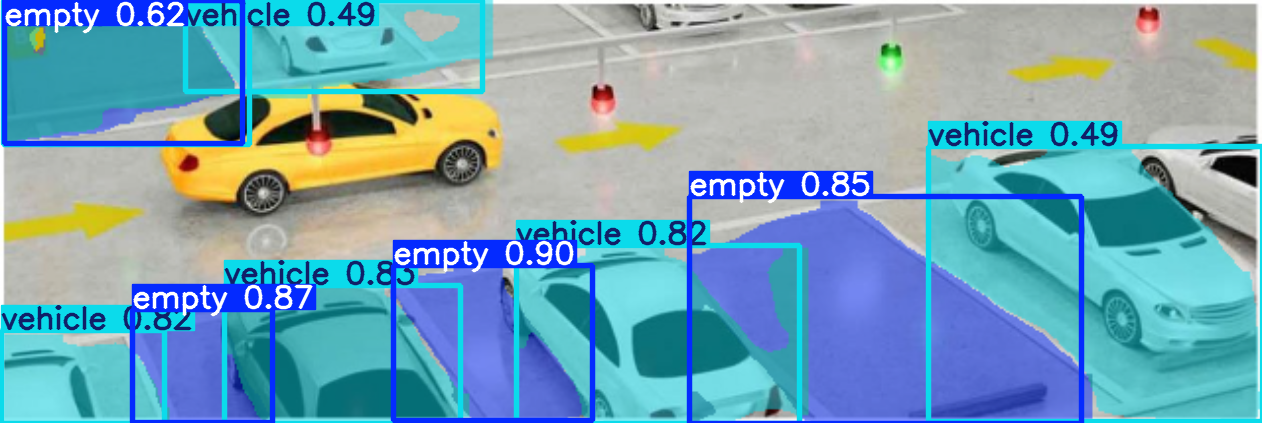

In [ ]:
trained_model = YOLO(trained_model_path)
results = trained_model.predict('/content/drive/MyDrive/AI/Car Parking Occupancy/test_images/44.png')
results[0].show()


image 1/1 /content/drive/MyDrive/AI/Car Parking Occupancy/test_images/images.jpg: 288x640 2 emptys, 1 vehicle, 58.9ms
Speed: 1.9ms preprocess, 58.9ms inference, 3.1ms postprocess per image at shape (1, 3, 288, 640)


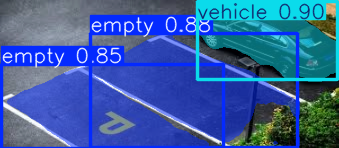

In [ ]:
results = model.predict('/content/drive/MyDrive/AI/Car Parking Occupancy/test_images/images.jpg')
results[0].show()

In [ ]:
# Testing with images
import os
from pathlib import Path

def predict_images_in_folder(model, model_name, input_folder, output_folder, conf=0.1, replace=True):
    """
    Predicts on all images in a folder and saves results.

    Args:
        model: YOLO model used for prediction.
        input_folder (str): Path to the folder with input images.
        output_folder (str): Path to the folder where output images will be saved.
        conf (float): Confidence threshold for predictions. Default is 0.1.
        replace (bool): If True, overwrite existing files. If False, skip files that already exist.

    Returns:
        None
    """

    # Create output folder if it doesn't exist
    Path(output_folder).mkdir(parents=True, exist_ok=True)

    # List all image files in the input folder
    image_extensions = (".jpg", ".jpeg", ".png")
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(image_extensions)]

    # Process each image
    for image_file in image_files:
        input_path = os.path.join(input_folder, image_file)
        output_path = os.path.join(output_folder, f"{model_name}_{image_file}")

        # Skip if the file already exists and replace is False
        if not replace and os.path.exists(output_path):
            print(f"Skipping {image_file} (already processed)")
            continue

        # Run prediction on the image
        results = model.predict(input_path, conf=conf)

        # Save the output image
        results[0].save(filename=output_path)

        print(f"Processed and saved: {output_path}")


In [ ]:
input_folder = '/content/drive/MyDrive/AI/Car Parking Occupancy/test_images'
output_folder = '/content/drive/MyDrive/AI/Car Parking Occupancy/test_images_output'

In [ ]:
predict_images_in_folder(model, "retrained-yolov11-seg", input_folder, output_folder, conf=0.18)


image 1/1 /content/drive/MyDrive/AI/Car Parking Occupancy/test_images/Untitled-design-28.png: 384x640 8 vehicles, 100.6ms
Speed: 3.2ms preprocess, 100.6ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)
Processed and saved: /content/drive/MyDrive/AI/Car Parking Occupancy/test_images_output/retrained-yolov11-seg_Untitled-design-28.png

image 1/1 /content/drive/MyDrive/AI/Car Parking Occupancy/test_images/images.jpg: 288x640 2 emptys, 1 vehicle, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 2.8ms postprocess per image at shape (1, 3, 288, 640)
Processed and saved: /content/drive/MyDrive/AI/Car Parking Occupancy/test_images_output/retrained-yolov11-seg_images.jpg

image 1/1 /content/drive/MyDrive/AI/Car Parking Occupancy/test_images/44.png: 224x640 3 emptys, 6 vehicles, 26.8ms
Speed: 2.2ms preprocess, 26.8ms inference, 3.5ms postprocess per image at shape (1, 3, 224, 640)
Processed and saved: /content/drive/MyDrive/AI/Car Parking Occupancy/test_images_output/retraine

In [ ]:
import os
import cv2
from ultralytics import YOLO

def predict_video(model, model_name, input_video_path, output_folder, conf=0.1):
    """
    Run YOLO segmentation model on a video and save the annotated output.

    Parameters:
        model: YOLO model object (e.g., YOLO('yolov8n-seg.pt'))
        model_name: str - Name used for output file (e.g., 'yolov8n-seg')
        input_video_path: str - Path to input video
        output_folder: str - Directory where the output video will be saved
        conf: float - Confidence threshold for predictions (default 0.1)
    """

    # Ensure output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Extract video filename
    video_file = os.path.basename(input_video_path)
    output_video_name = f"{model_name}_{video_file}"
    output_video_path = os.path.join(output_folder, output_video_name)

    # Open input video
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        raise IOError(f"Failed to open video: {input_video_path}")

    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    print(f"Processing video: {input_video_path} with model: {model_name}")

    # Frame-by-frame prediction
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Run prediction
        results = model.predict(source=frame, conf=conf, verbose=False)

        # Get annotated frame
        annotated_frame = results[0].plot()

        # Write to output
        out.write(annotated_frame)

    cap.release()
    out.release()
    print(f"Saved segmented video to: {output_video_path}")


In [ ]:
input_video_path = '/content/drive/MyDrive/AI/Car Parking Occupancy/test_videos/vecteezy_parking-lot-movement_1623435.mp4'
output_folder = '/content/drive/MyDrive/AI/Car Parking Occupancy/test_video_output'

In [ ]:
predict_video(model, model_name='retrained-yolov11n-seg', input_video_path=input_video_path, output_folder=output_folder, conf=0.25)


Processing video: /content/drive/MyDrive/AI/Car Parking Occupancy/test_videos/vecteezy_parking-lot-movement_1623435.mp4 with model: retrained-yolov11n-seg
Saved segmented video to: /content/drive/MyDrive/AI/Car Parking Occupancy/test_video_output/retrained-yolov11n-seg_vecteezy_parking-lot-movement_1623435.mp4
